In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv('sample_sales_data.csv')

In [5]:
data.head(5)

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [9]:
#Data Cleaning

data.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
data.head(10)

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card
5,b5b3c8b9-f496-484d-aa30-4f2efb5ed56c,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash
6,4997b1ae-f5aa-4b9f-8fc8-22ad8f19837c,2022-03-07 19:36:57,14736243-d346-438f-9535-d80fcb9f3882,fruit,standard,1.49,4,5.96,e-wallet
7,bfffee68-0736-42af-bd3e-4ca77541b0d6,2022-03-07 19:03:20,0ddc2379-adba-4fb0-aa97-19fcafc738a1,fruit,basic,3.99,4,15.96,credit card
8,ce50e984-90cd-4b47-8537-3a4e32e6d314,2022-03-07 11:34:32,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,non-member,3.99,1,3.99,credit card
9,f0700cc9-e6f5-4b9a-add4-05e64b4f495b,2022-03-07 09:20:12,35e00193-aa27-4121-87f4-6ac0d8a8671f,fruit,premium,0.49,3,1.47,e-wallet


In [11]:
# Discriptive Analysis

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [12]:
data.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


In [14]:
#Data Visualization

import seaborn as sns

In [26]:
#This is used to visualize the distribution of numeric numbers (continuous variable)
def plot_continuous_distibution(data: pd.DataFrame = None, column: str = None, height:int = 8 ):
  _ = sns.displot(data, x = column, kde = True, height = height, aspect = height/5).set(title = f'Distribution of {column}')

#This is used to visualize the unique values in distibution
def get_uique_values(data,column):
  num_unique_value = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f'{column} has {num_unique_value} unique values')
  print(value_counts)

#This is used to visualize distibution of categorical data
def plot_categorical_data(data:pd.DataFrame = None, column : str = None, height: int = 8, aspect: int = 2):
  _ = sns.catplot(data = data, x = column, kind = 'count',height = height, aspect = aspect).set(title = f'Distribution of {column}')

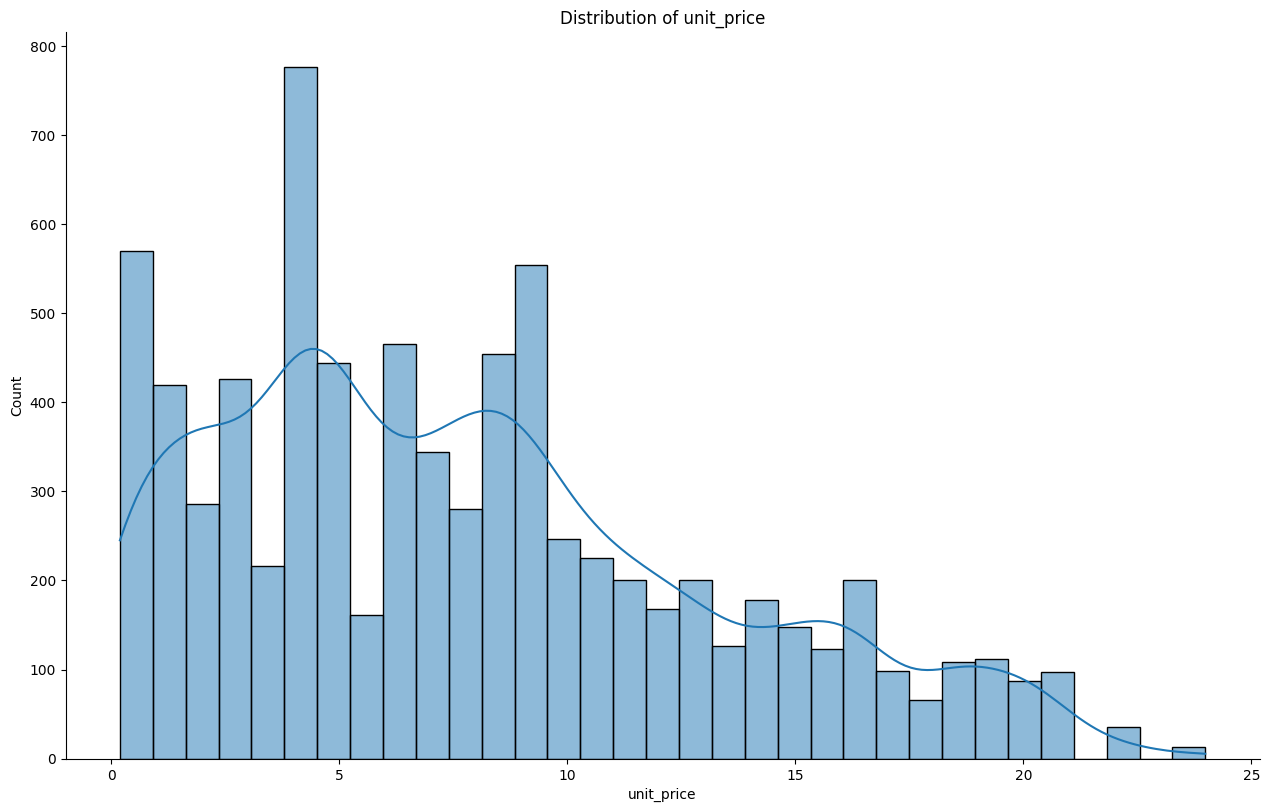

In [27]:
plot_continuous_distibution(data, 'unit_price')

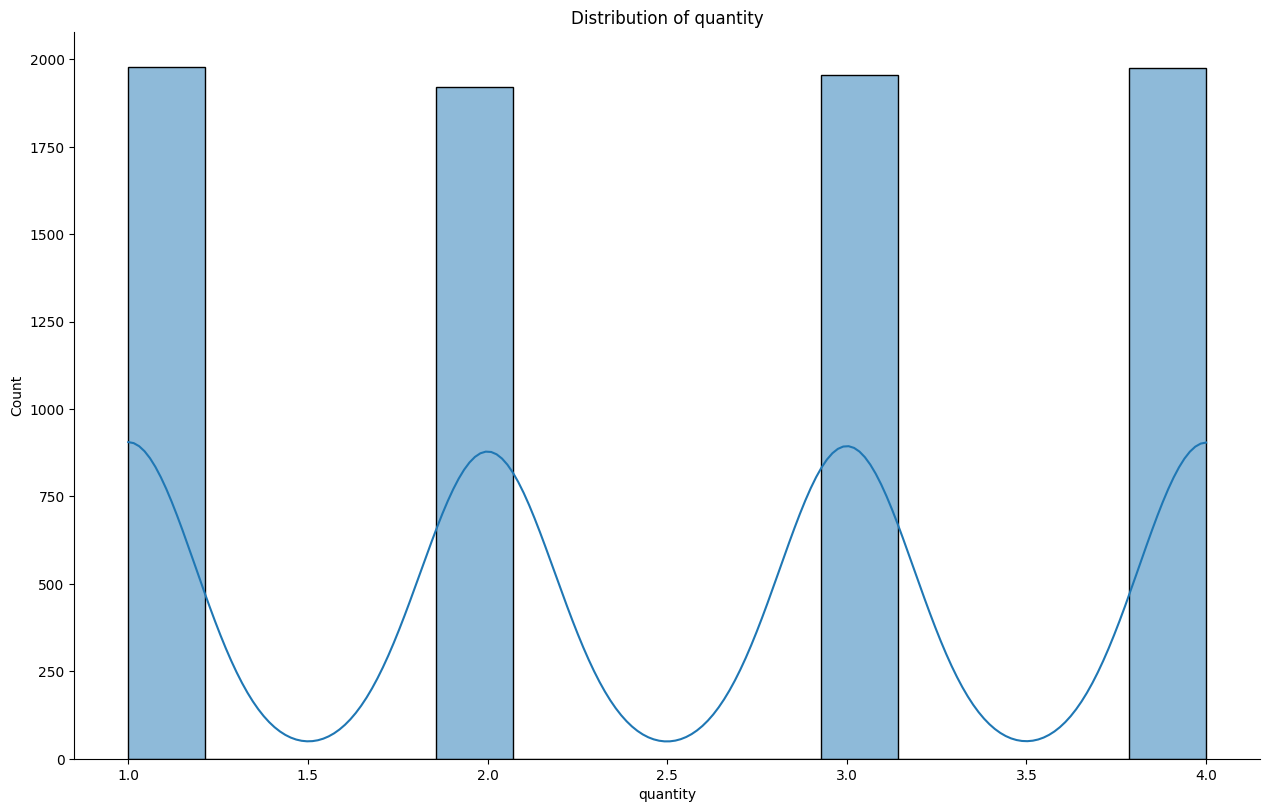

In [28]:
plot_continuous_distibution(data,'quantity')

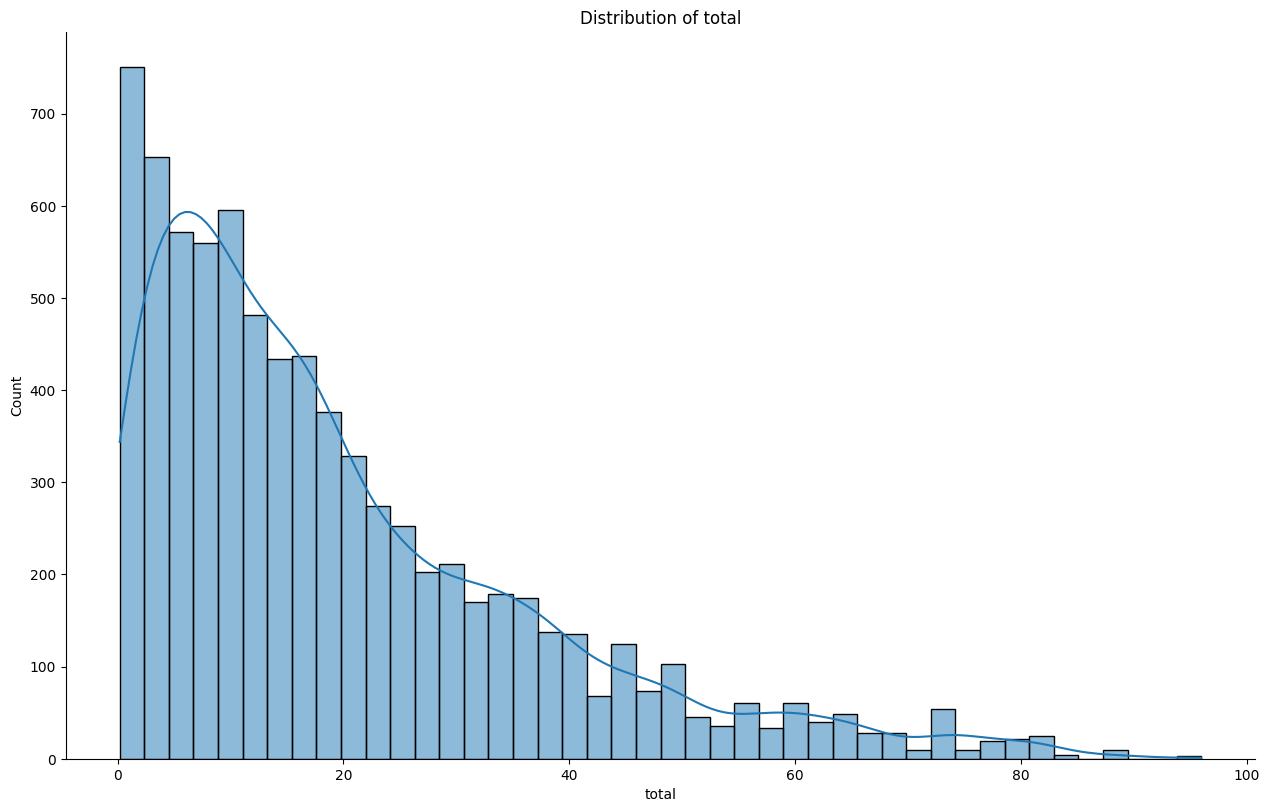

In [32]:
plot_continuous_distibution(data,'total')

In [35]:
get_uique_values(data, 'category')

category has 22 unique values
category
fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: count, dtype: int64


In [36]:
get_uique_values(data, 'transaction_id')

transaction_id has 7829 unique values
transaction_id
a1c82654-c52c-45b3-8ce8-4c2a1efe63ed    1
6532e258-95fd-4eb5-8c67-2bfb879a8fec    1
6fce2af3-47a0-4755-99c9-0cefb5ab6f41    1
6476e388-3990-471f-b415-3ee59ae18832    1
10afe89b-c45b-49a2-b0be-dec89a4c3f80    1
                                       ..
a9abe5ac-99d5-4d8b-bbbd-c2a207642849    1
6b0b23e8-412b-4665-8cc4-3e37f0d9e195    1
711a4162-1985-4f5a-94ca-137cfacaeadf    1
7d1e9010-dbaf-4770-a467-f31477910f7a    1
afd70b4f-ee21-402d-8d8f-0d9e13c2bea6    1
Name: count, Length: 7829, dtype: int64


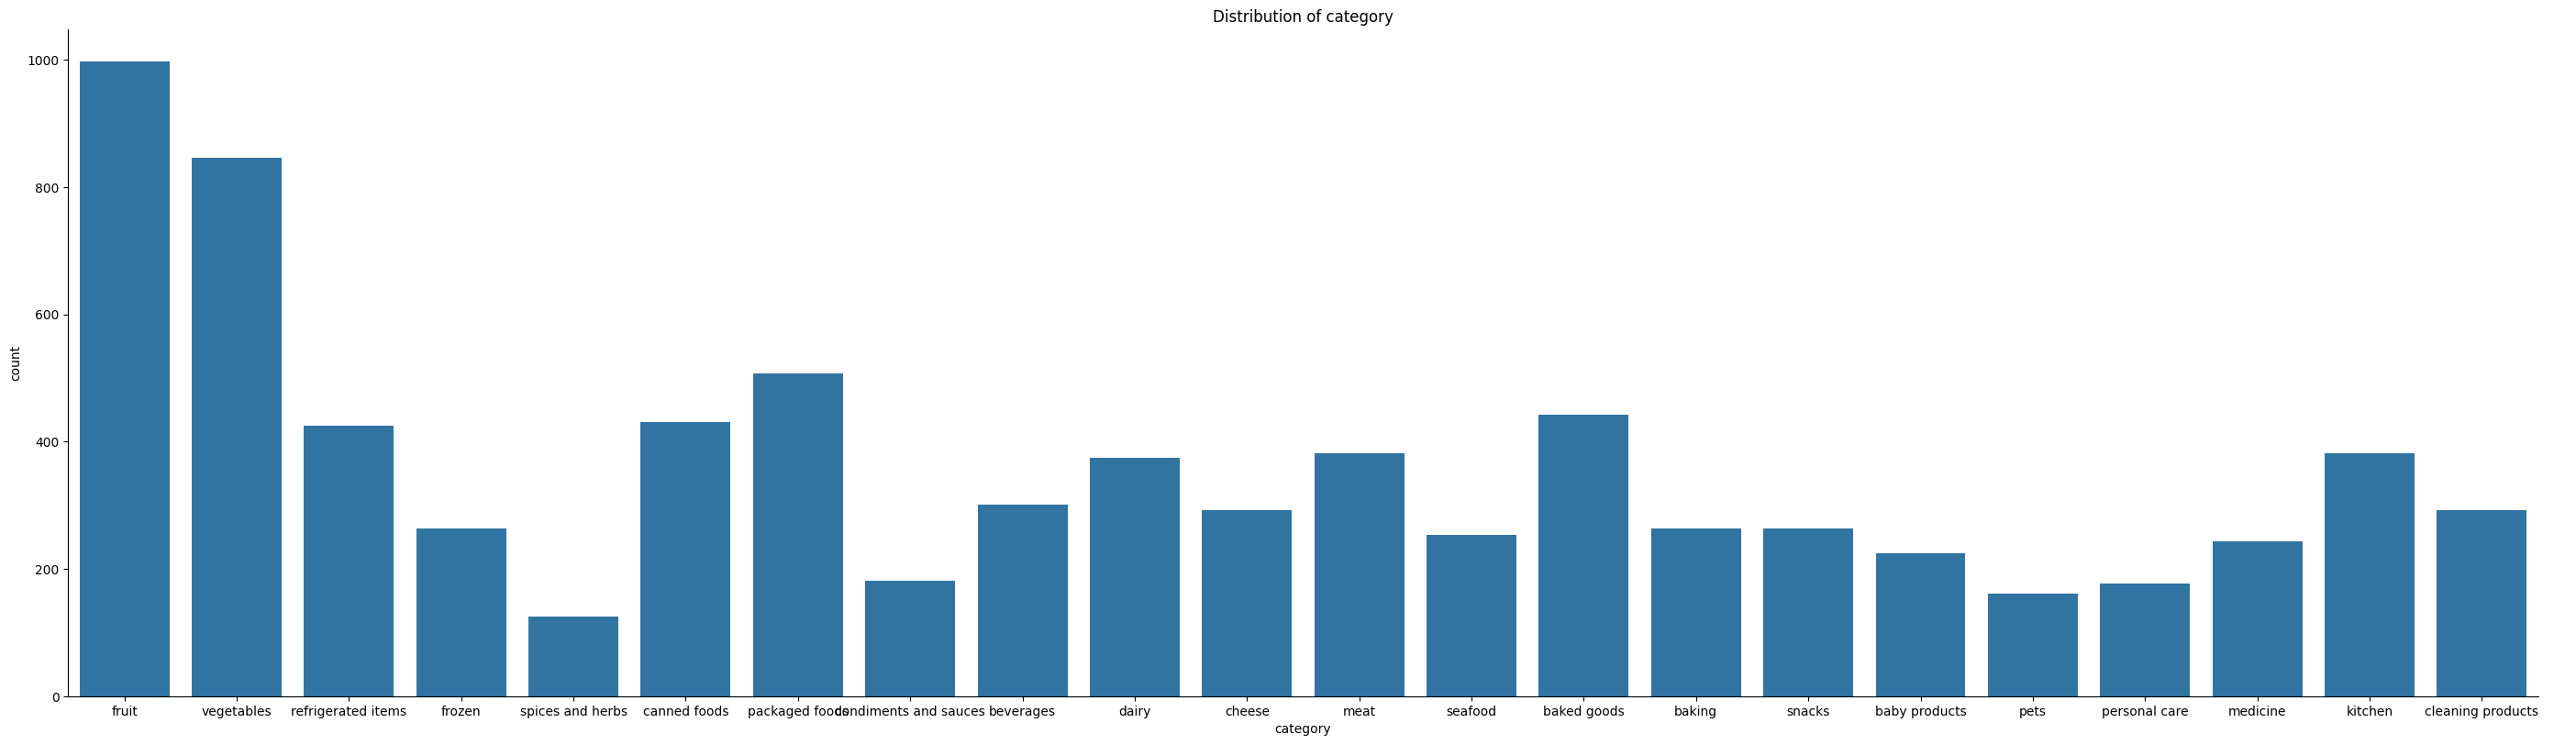

In [38]:
plot_categorical_data(data, 'category',height = 8, aspect = 3.5)

In [40]:
get_uique_values(data, 'customer_type')

customer_type has 5 unique values
customer_type
non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: count, dtype: int64


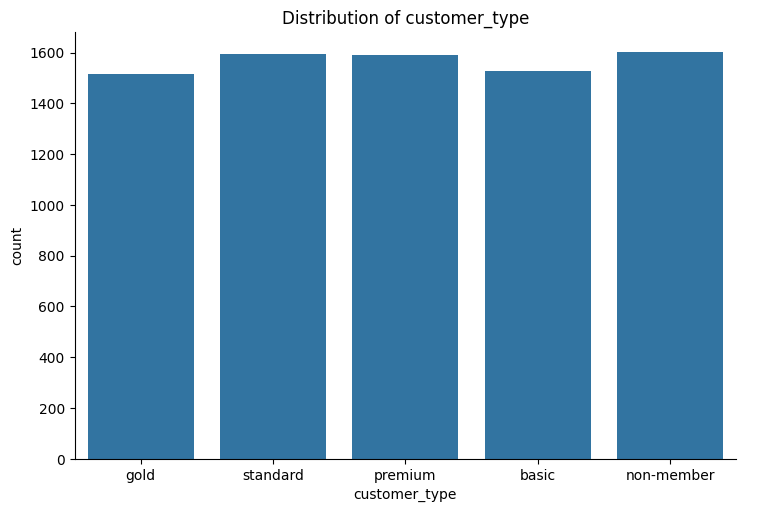

In [43]:
plot_categorical_data(data, 'customer_type', height=5, aspect=1.5)

In [44]:
get_uique_values(data, 'payment_type')

payment_type has 4 unique values
payment_type
cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: count, dtype: int64


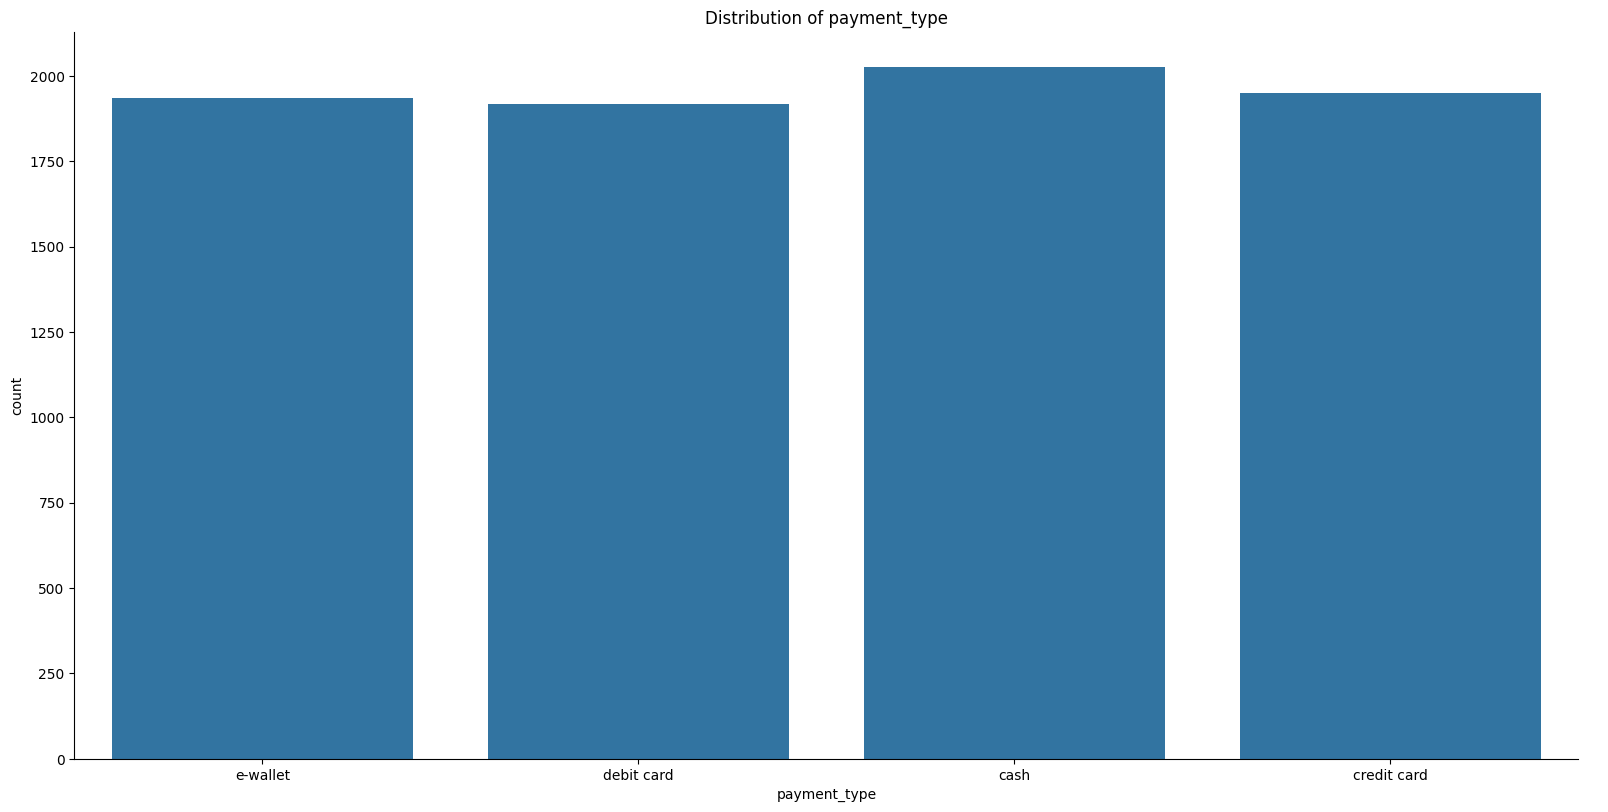

In [45]:
plot_categorical_data(data,'payment_type')